In [13]:
import numpy as np
from pathlib import Path
from sklearn.svm import LinearSVC
from scipy.io import loadmat
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut, cross_val_score, permutation_test_score
from matplotlib.patches import Patch
import csv

In [2]:
matlab_dataset_path = r"H:\Data\Kim Data\@AP18_032618\PreRobotNP_RobotNP.mat"

In [3]:
data = loadmat(matlab_dataset_path)
X = np.asarray(data.get('X'), dtype=float)
y = np.ravel(data.get('y')).astype(int)

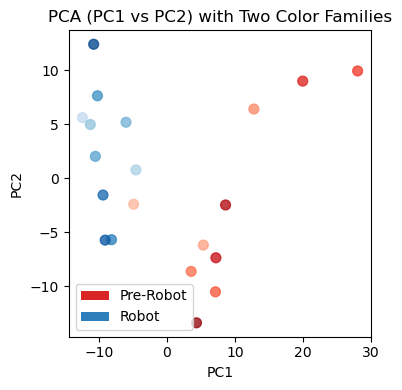

In [13]:
# Run PCA on the data and plot with PC1 and PC2 with colors

import matplotlib as mpl
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# --- color mapping: y==1 -> Reds, y==2 -> Blues; intensity encodes sequence within each class ---
base_maps = {1: 'Reds', 2: 'Blues'}  # add more labels->cmaps if needed
colors = np.zeros((len(y), 4))       # RGBA per point

for label, cmap_name in base_maps.items():
    idx = np.where(y == label)[0]              # indices for this class, in original order (sequence)
    n = len(idx)
    if n == 0:
        continue
    # make intensities from light to dark; avoid extremes so dots stay visible
    t = np.linspace(0.25, 0.9, n)
    cmap = plt.get_cmap(cmap_name)
    colors[idx] = cmap(t)

# --- plot ---
plt.figure(figsize=(4, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=50, alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('')

# simple legend (dummy handles)

legend_elems = [
    Patch(facecolor=plt.get_cmap('Reds')(0.7), label='Pre-Robot'),
    Patch(facecolor=plt.get_cmap('Blues')(0.7), label='Robot'),
]
plt.legend(handles=legend_elems, loc='best', frameon=True)
plt.tight_layout()
plt.show()


In [23]:
matlab_dataset_paths = [
    r"H:\Data\Kim Data\@AP18_032618\PreRobotNP_RobotNP.mat",
    r"H:\Data\Kim Data\@AP42_111819\PreRobotNP_RobotNP.mat",
    r"H:\Data\Kim Data\@AP32_053019\PreRobotNP_RobotNP.mat",
    r"H:\Data\Kim Data\@AP44_121919\PreRobotNP_RobotNP.mat",
    ]

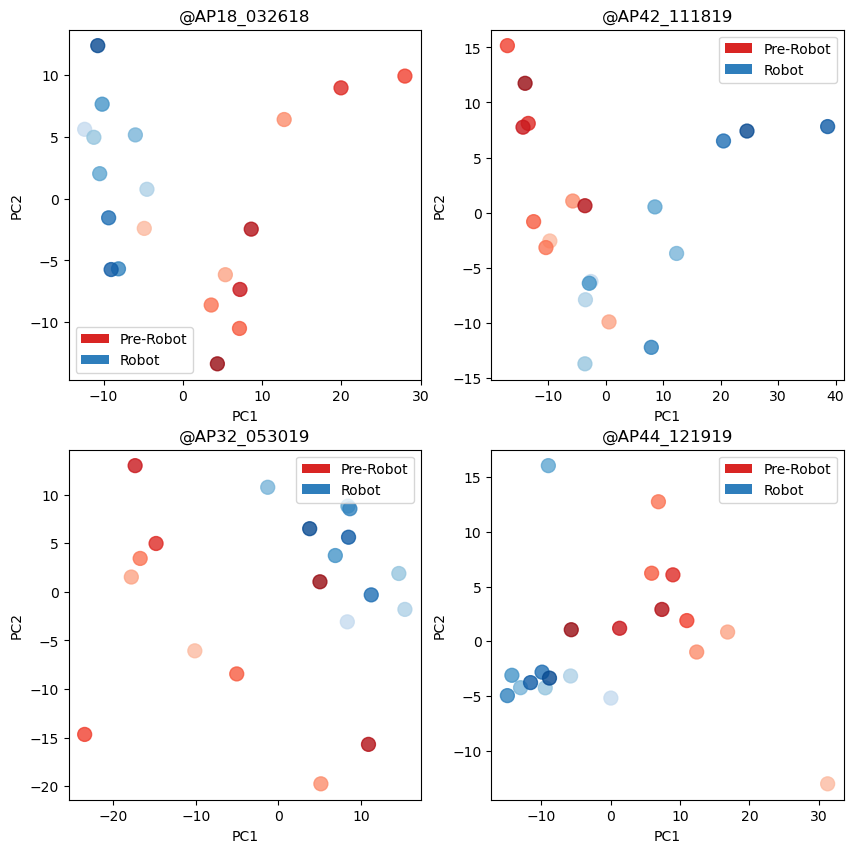

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(4):
    data = loadmat(matlab_dataset_paths[i])
    X = np.asarray(data.get('X'), dtype=float)
    y = np.ravel(data.get('y')).astype(int)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # --- color mapping: y==1 -> Reds, y==2 -> Blues; intensity encodes sequence within each class ---
    base_maps = {1: 'Reds', 2: 'Blues'}  # add more labels->cmaps if needed
    colors = np.zeros((len(y), 4))       # RGBA per point

    for label, cmap_name in base_maps.items():
        idx = np.where(y == label)[0]              # indices for this class, in original order (sequence)
        n = len(idx)
        if n == 0:
            continue
        # make intensities from light to dark; avoid extremes so dots stay visible
        t = np.linspace(0.25, 0.9, n)
        cmap = plt.get_cmap(cmap_name)
        colors[idx] = cmap(t)

    # --- plot ---
    ax[i//2, i%2].scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=100, alpha=0.8)
    ax[i//2, i%2].set_title(Path(matlab_dataset_paths[i]).parent.name)
    ax[i//2, i%2].set_xlabel('PC1')
    ax[i//2, i%2].set_ylabel('PC2')

    legend_elems = [
        Patch(facecolor=plt.get_cmap('Reds')(0.7), label='Pre-Robot'),
        Patch(facecolor=plt.get_cmap('Blues')(0.7), label='Robot'),
    ]
    ax[i//2, i%2].legend(handles=legend_elems, loc='best', frameon=True)

plt.show()


In [7]:

matlab_dataset_path = r"H:\Data\Kim Data\@AP18_032618\PreRobotNP_PreRobotP_RobotFirstNP_RobotFirstP.mat"
data = loadmat(matlab_dataset_path)
X = np.asarray(data.get('X'), dtype=float)
y = np.ravel(data.get('y')).astype(int)

In [11]:
matlab_dataset_paths = [
    r"H:\Data\Kim Data\@AP18_032618\PreRobotNP_PreRobotP_RobotFirstNP_RobotFirstP.mat",
    r"H:\Data\Kim Data\@AP42_111819\PreRobotNP_PreRobotP_RobotFirstNP_RobotFirstP.mat",
    r"H:\Data\Kim Data\@AP32_053019\PreRobotNP_PreRobotP_RobotFirstNP_RobotFirstP.mat",
    r"H:\Data\Kim Data\@AP44_121919\PreRobotNP_PreRobotP_RobotFirstNP_RobotFirstP.mat",
    ]

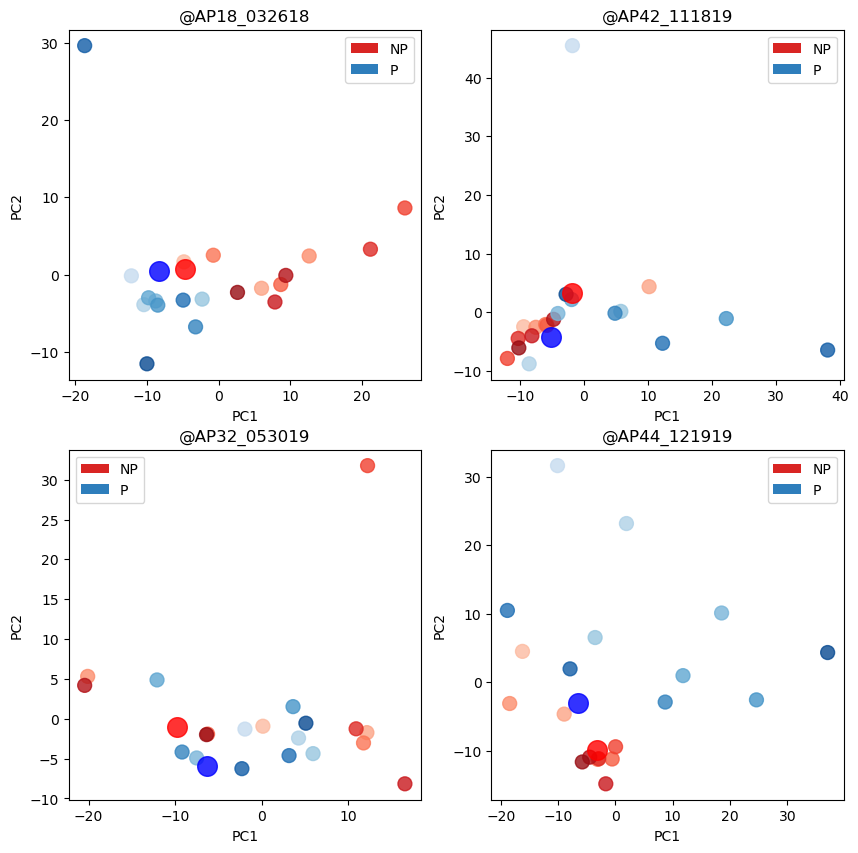

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(4):
    data = loadmat(matlab_dataset_paths[i])
    X = np.asarray(data.get('X'), dtype=float)
    y = np.ravel(data.get('y')).astype(int)

    pca = PCA(n_components=2)
    pca.fit(X[:-2, :])  # leave out last two points for scaling consistency
    X_pca = pca.transform(X)

    # --- color mapping: y==1 -> Reds, y==2 -> Blues; intensity encodes sequence within each class ---
    base_maps = {1: 'Reds', 2: 'Blues'}  # add more labels->cmaps if needed
    colors = np.zeros((len(y)-2, 4))       # RGBA per point

    for label, cmap_name in base_maps.items():
        idx = np.where(y == label)[0]              # indices for this class, in original order (sequence)
        n = len(idx)
        if n == 0:
            continue
        # make intensities from light to dark; avoid extremes so dots stay visible
        t = np.linspace(0.25, 0.9, n)
        cmap = plt.get_cmap(cmap_name)
        colors[idx] = cmap(t)


    # --- plot ---
    ax[i//2, i%2].scatter(X_pca[:-2, 0], X_pca[:-2, 1], c=colors, s=100, alpha=0.8)
    ax[i//2, i%2].scatter(X_pca[-2, 0], X_pca[-2, 1], c='red', s=200, alpha=0.8)
    ax[i//2, i%2].scatter(X_pca[-1, 0], X_pca[-1, 1], c='blue', s=200, alpha=0.8)
    ax[i//2, i%2].set_title(Path(matlab_dataset_paths[i]).parent.name)
    ax[i//2, i%2].set_xlabel('PC1')
    ax[i//2, i%2].set_ylabel('PC2')

    legend_elems = [
        Patch(facecolor=plt.get_cmap('Reds')(0.7), label='NP'),
        Patch(facecolor=plt.get_cmap('Blues')(0.7), label='P'),
    ]
    ax[i//2, i%2].legend(handles=legend_elems, loc='best', frameon=True)

plt.show()
